In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [2]:
bbtheory_chars={} 
Penny=''
Raj=''
Sheldon=''
Leonard=''
Howard=''
Amy=''
Bernadette=''

with open("big_bang_transcripts/season_all/merged1-3.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged4-6.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged7-9.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged10.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
       

bbtheory_chars['Raj']=Raj
bbtheory_chars['Penny']=Penny
bbtheory_chars['Sheldon']=Sheldon
bbtheory_chars['Leonard']=Leonard
bbtheory_chars['Howard']=Howard

In [3]:
import pandas as pd
df1 = pd.DataFrame([x for x in bbtheory_chars['Raj'].split('\n')])

df2 = pd.DataFrame([x for x in bbtheory_chars['Penny'].split('\n')])

df3 = pd.DataFrame([x for x in bbtheory_chars['Sheldon'].split('\n')])
df4 = pd.DataFrame([x for x in bbtheory_chars['Leonard'].split('\n')])

df5 = pd.DataFrame([x for x in bbtheory_chars['Howard'].split('\n')])


In [4]:
df1.head()

,0
0,It’s fantastic. Unbelievable.
1,Why?
2,Smooth.
3,Are there any chopsticks?
4,"Also, the pretty girl left."


In [5]:
listOfScores1 = ['Raj'] *df1.shape[0]
listOfScores2 = ['Penny'] *df2.shape[0]
listOfScores3 = ['Sheldon'] *df3.shape[0]
listOfScores4 = ['Leonard'] *df4.shape[0]
listOfScores5 = ['Howard'] *df5.shape[0]


In [38]:
df1['Character'] = listOfScores1
df2['Character'] = listOfScores2 
df3['Character'] = listOfScores3
df4['Character'] = listOfScores4
df5['Character'] = listOfScores5


In [39]:
df1=df1.rename(columns={0: 'dialogue'})
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})


In [40]:
df = pd.concat([df1, df2,df3,df4,df5])
df.tail()

,dialogue,Score,Character
5740,She’s not that kind of doctor.,Howard,Howard
5741,"Great. Anybody’s better than, mmm.",Howard,Howard
5742,"We should call Guinness, that might be a record.",Howard,Howard
5743,You done trying to make yourself feel better?,Howard,Howard
5744,,Howard,Howard


In [42]:
from io import StringIO
col = ['Character', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Character', 'dialogue']
df['category_id'] = df['Character'].factorize()[0]
category_id_df = df[['Character', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character']].values)
df.tail()

,Character,dialogue,category_id
5740,Howard,She’s not that kind of doctor.,4
5741,Howard,"Great. Anybody’s better than, mmm.",4
5742,Howard,"We should call Guinness, that might be a record.",4
5743,Howard,You done trying to make yourself feel better?,4
5744,Howard,,4


In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

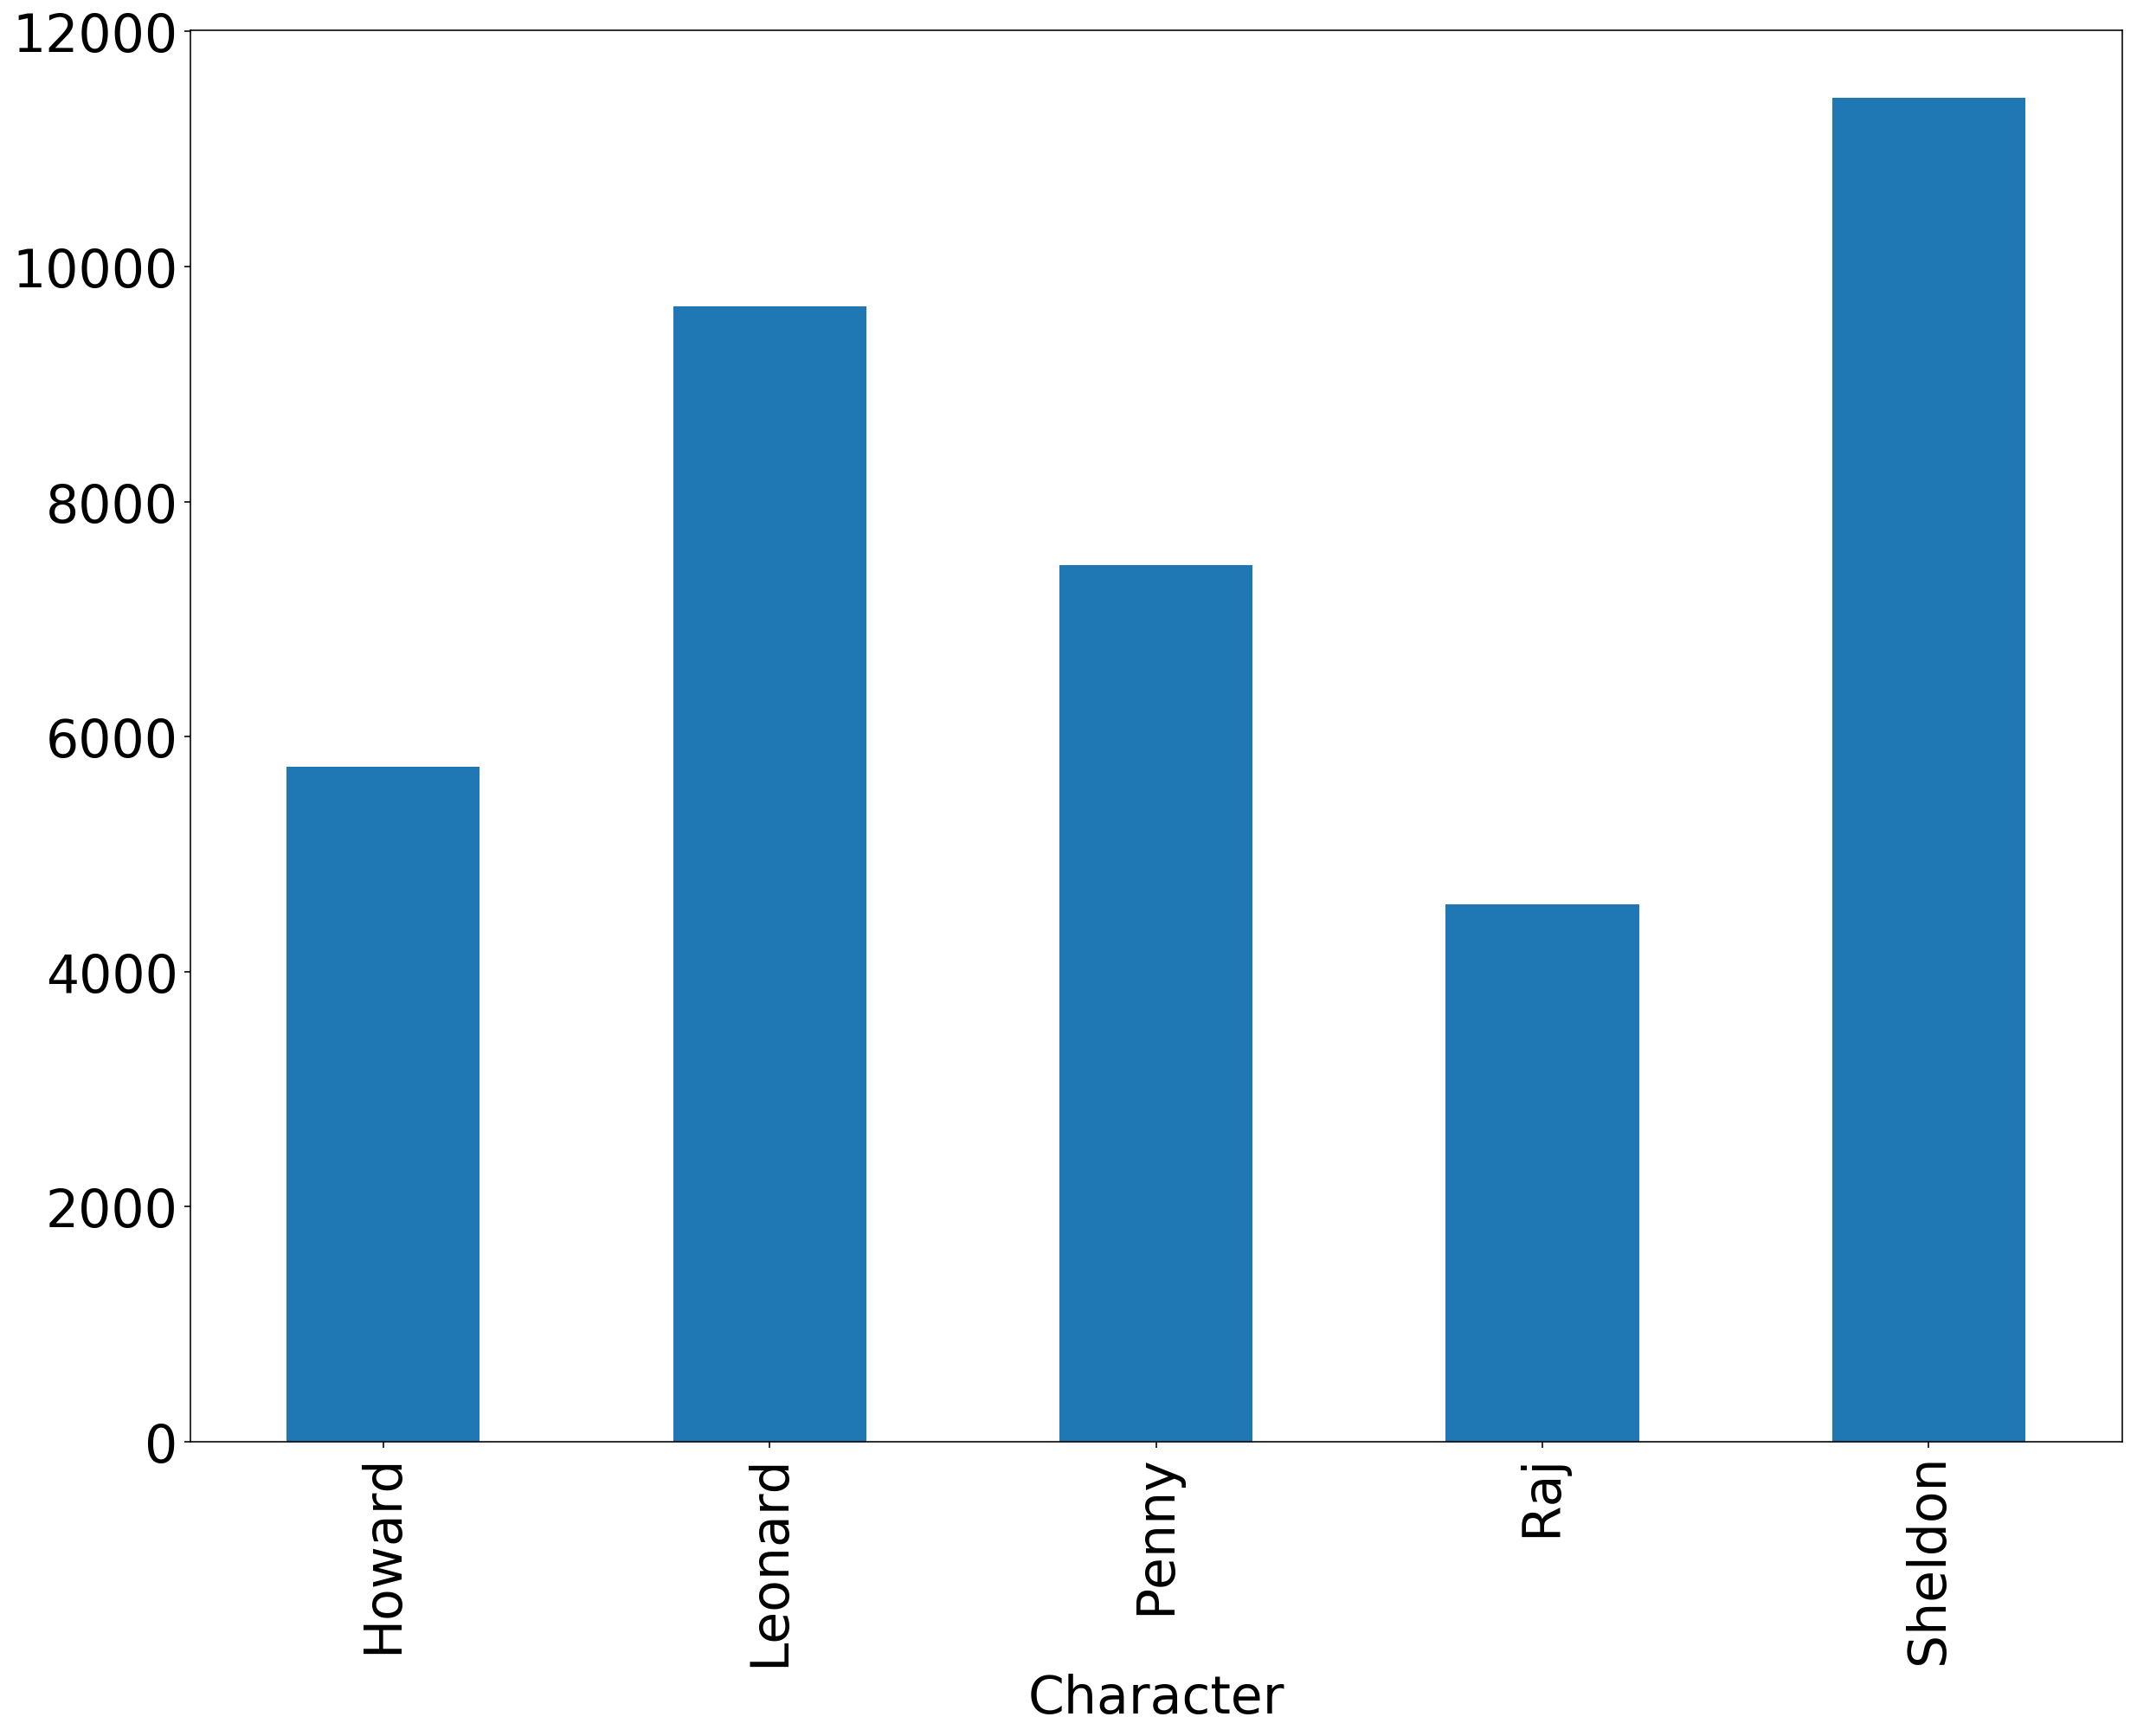

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))
df.groupby('Character').dialogue.count().plot.bar(ylim=0)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams.update({'font.size': 30})
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['category_id'], test_size=0.33, random_state=42)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
vocab_size = 30000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)





In [14]:
MAX_SEQUENCE_LENGTH = 120
X = tokenizer.texts_to_sequences(X_train.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (26044, 120)


array([[    0,     0,     0, ...,     0,    81,  1701],
       [    0,     0,     0, ...,    19,     4,  2206],
       [    0,     0,     0, ...,  2702,   156,  6148],
       ...,
       [    0,     0,     0, ...,   117,    53, 16576],
       [    0,     0,     0, ...,    16,    44,    14],
       [    0,     0,     0, ...,   396,     8, 16577]], dtype=int32)

In [15]:
x_test=tokenizer.texts_to_sequences(X_test.values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_test.shape)
x_test

Shape of data tensor: (12829, 120)


array([[   0,    0,    0, ..., 1012,   28, 2794],
       [   0,    0,    0, ...,  450,  427,  109],
       [   0,    0,    0, ..., 1353,  168,  193],
       ...,
       [   0,    0,    0, ...,   24,   11,  347],
       [   0,    0,    0, ..., 7452,    1,  850],
       [   0,    0,    0, ...,  144,   31,  229]], dtype=int32)

In [16]:
Y = pd.get_dummies(y_train).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [17]:
y_test = pd.get_dummies(y_test).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
y_test

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [18]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64


from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(5, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1102 13:17:24.827026 4648836544 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 23439 samples, validate on 2605 samples
Epoch 1/10
23439/23439 [==============================] - 30s 1ms/sample - loss: 1.5025 - accuracy: 0.3484 - val_loss: 1.4581 - val_accuracy: 0.3697
Epoch 2/10
23439/23439 [==============================] - 27s 1ms/sample - loss: 1.3758 - accuracy: 0.4197 - val_loss: 1.4326 - val_accuracy: 0.3954
Epoch 3/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 1.2469 - accuracy: 0.4946 - val_loss: 1.4630 - val_accuracy: 0.4004
Epoch 4/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 1.1183 - accuracy: 0.5548 - val_loss: 1.5079 - val_accuracy: 0.3812
Epoch 5/10
23439/23439 [==============================] - 27s 1ms/sample - loss: 1.0140 - accuracy: 0.5991 - val_loss: 1.6029 - val_accuracy: 0.3935


In [19]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(6, activation='sigmoid')
# ])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


In [20]:
# num_epochs = 10
# model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [24]:
y_pred = model1.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [25]:
y_test

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

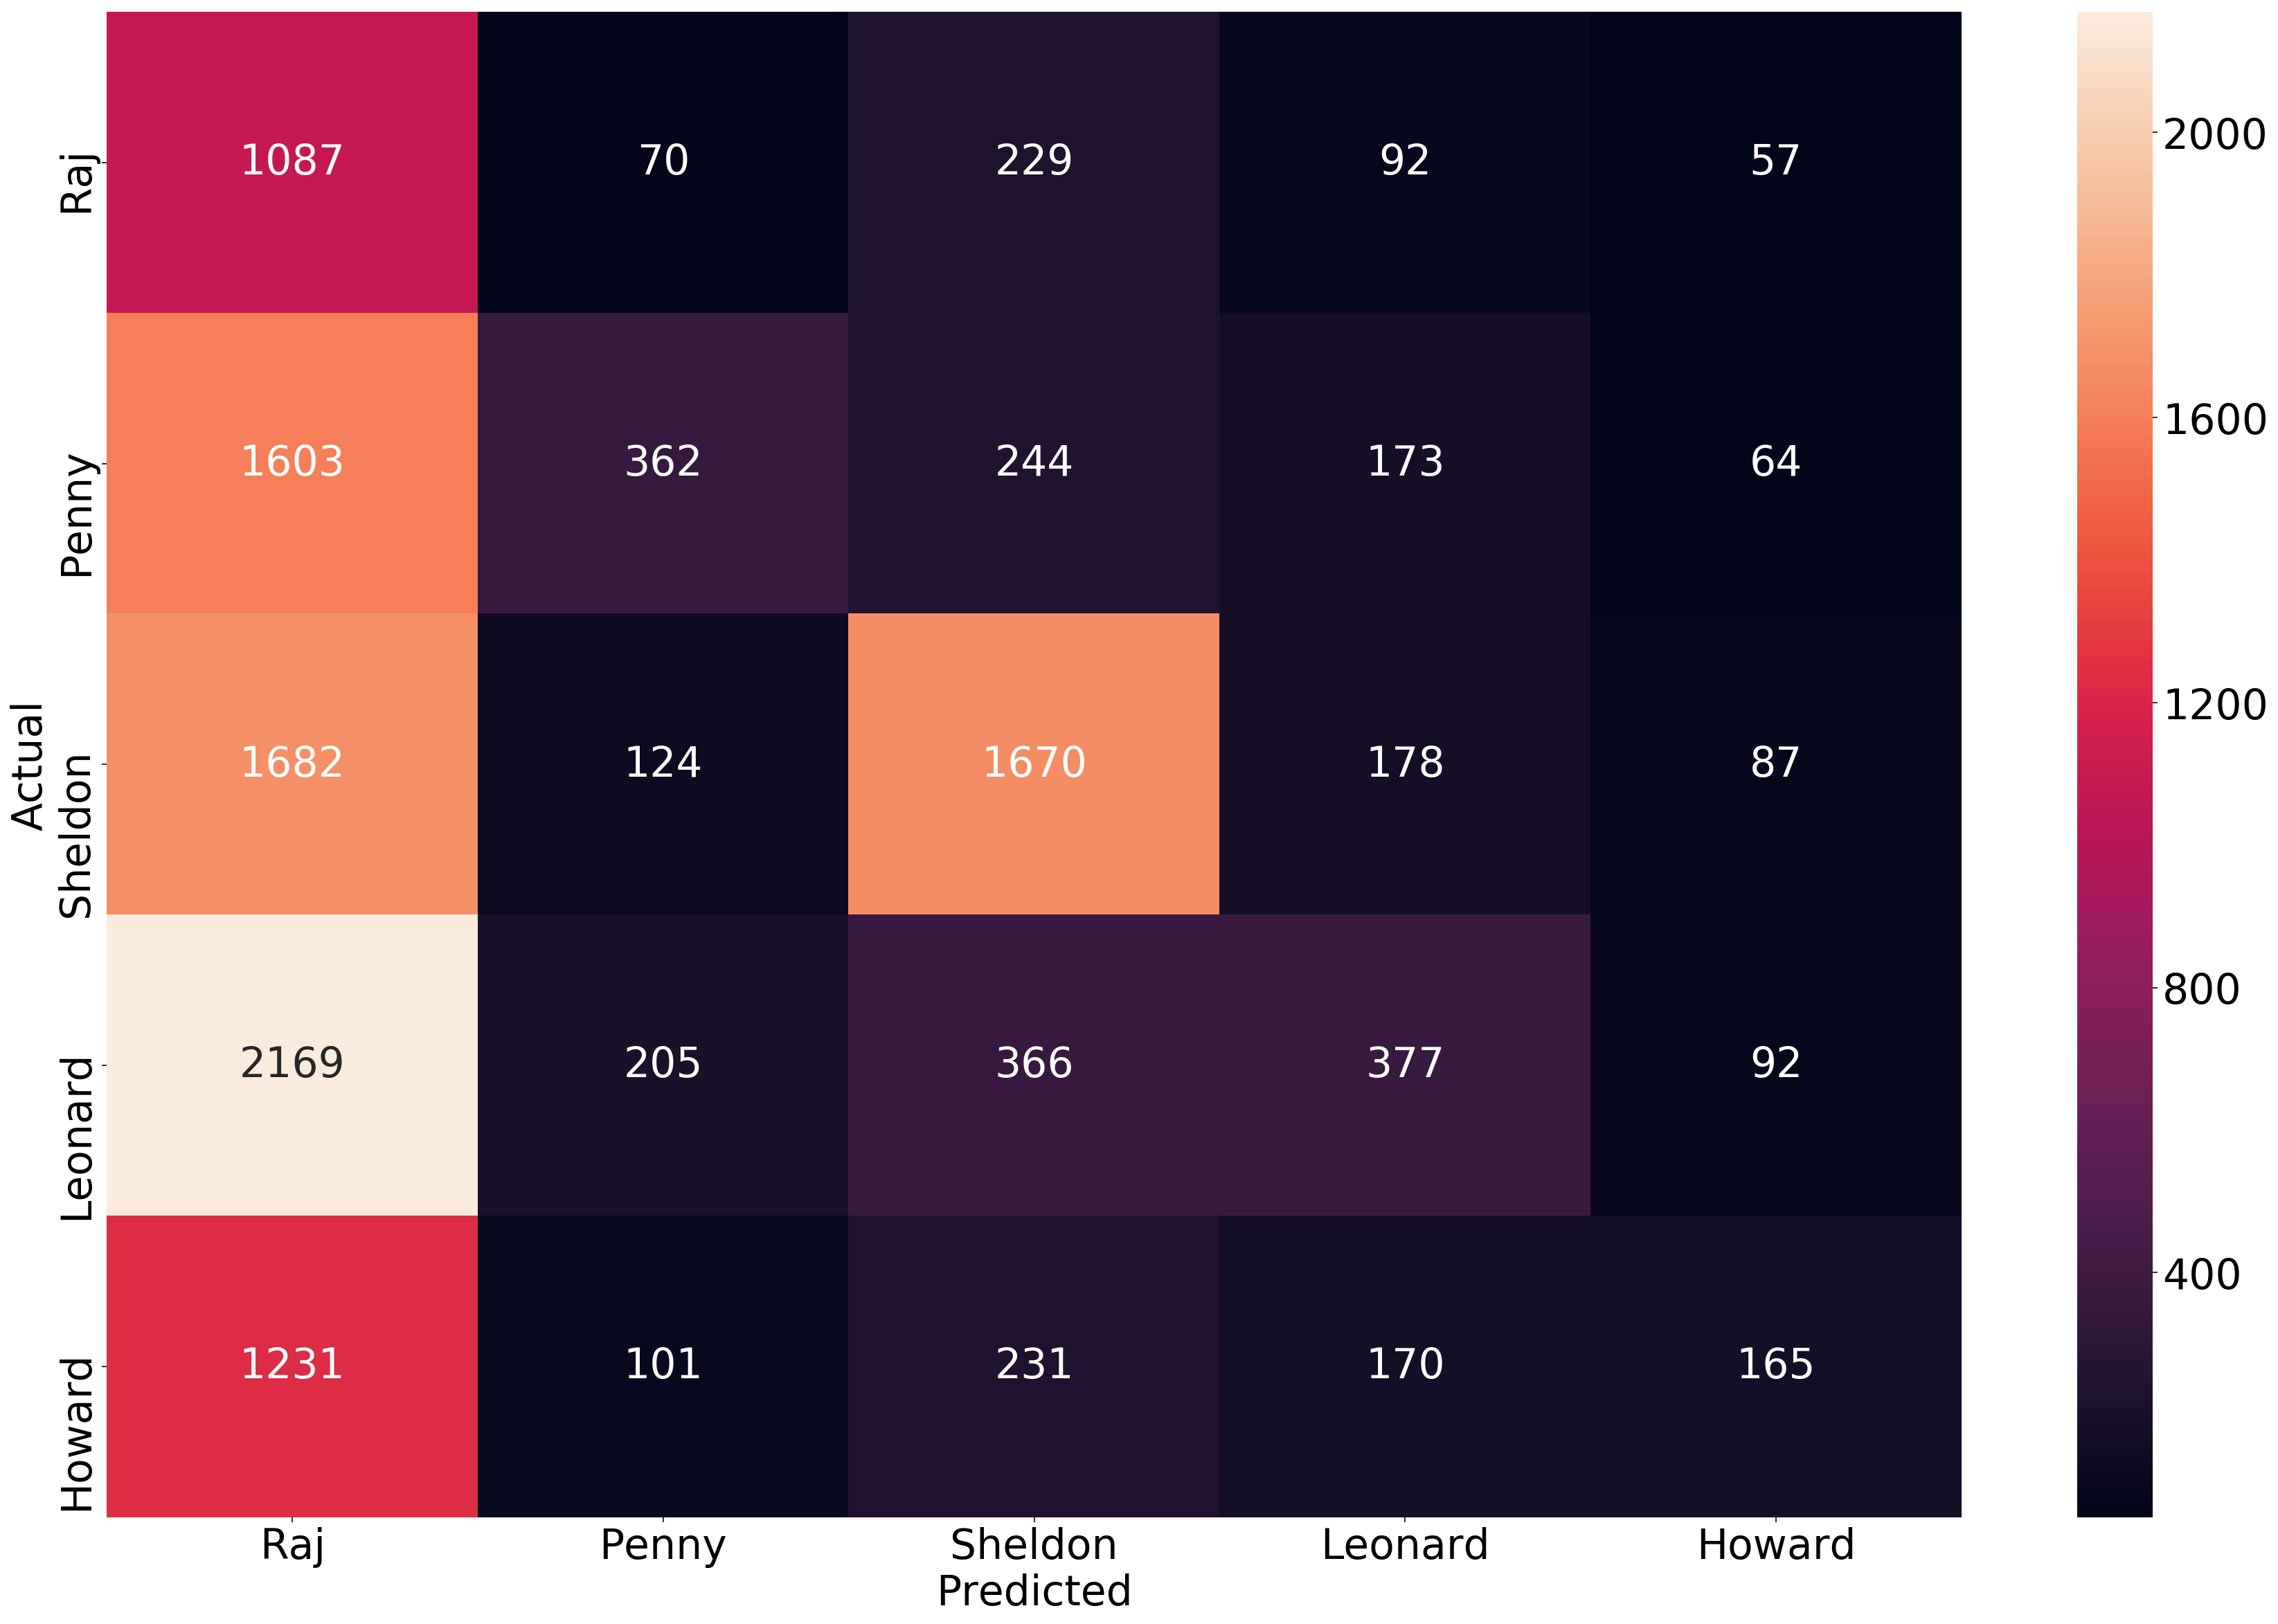

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)


fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.rcParams.update({'font.size': 40})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####stuck here#####

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))